Data wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("1730285881-Airbnb_Open_Data.csv", low_memory=False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
import pandas as pd

# If needed, load your CSV (uncomment the next line)
# df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

# ----------------------------
# 0) Normalize column names
# ----------------------------
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_')
)

# ----------------------------
# 1) Drop duplicates
# ----------------------------
df.drop_duplicates(inplace=True)

# ----------------------------
# 2) Drop unwanted columns (if present)
# ----------------------------
df.drop(columns=[c for c in ['house_rules', 'license'] if c in df.columns],
        inplace=True, errors='ignore')

# ----------------------------
# 3) Clean price -> numeric 'price_$'
# ----------------------------
if 'price' in df.columns:
    df['price_$'] = (
        df['price'].astype(str)
                    .str.replace(r'[\$,]', '', regex=True)
                    .str.strip()
    )
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')

# ----------------------------
# 4) Clean service fee -> numeric 'service_fee_$' (if present)
#    Many datasets miss this column; don't delete rows for it.
# ----------------------------
if 'service_fee' in df.columns:
    df['service_fee_$'] = (
        df['service_fee'].astype(str)
                          .str.replace(r'[\$,]', '', regex=True)
                          .str.strip()
    )
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')
    # Keep rows; if missing, assume 0 for analysis
    df['service_fee_$'] = df['service_fee_$'].fillna(0)

# ----------------------------
# 5) Drop rows that are entirely NaN
# ----------------------------
df.dropna(how='all', inplace=True)

# ----------------------------
# 6) Safe dtype conversions / renames
# ----------------------------
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host_id' in df.columns:
    df['host_id'] = df['host_id'].astype(str)

# handle 'last review' variants
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
elif 'last_review' not in df.columns and 'last_review' in df.rename(columns={'last review':'last_review'}).columns:
    df.rename(columns={'last review': 'last_review'}, inplace=True)
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# handle 'Construction year' variants
for cand in ['construction_year', 'construction_year_', 'construction_years', 'construction_year__']:
    if cand in df.columns:
        df.rename(columns={cand: 'construction_year'}, inplace=True)
        break
if 'construction_year' in df.columns:
    df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce').astype('Int64')

# ----------------------------
# 7) Fix neighbourhood group spelling (brookln -> Brooklyn)
# ----------------------------
for ng_col in ['neighbourhood_group', 'neighborhood_group']:
    if ng_col in df.columns:
        mask = df[ng_col].astype(str).str.lower().eq('brookln')
        if mask.any():
            df.loc[mask, ng_col] = 'Brooklyn'

# ----------------------------
# 8) Drop unrealistic availability values (>365)
#    (Handle both 'availability 365' and 'availability_365' cases)
# ----------------------------
if 'availability_365' in df.columns:
    df = df[df['availability_365'].between(0, 365, inclusive='both')]
elif 'availability_365' not in df.columns and 'availability_365' in df.rename(columns={'availability_365': 'availability_365'}).columns:
    df.rename(columns={'availability_365': 'availability_365'}, inplace=True)
    df = df[df['availability_365'].between(0, 365, inclusive='both')]
elif 'availability_365' not in df.columns and 'availability_365' not in df.columns and 'availability_365' not in df.columns and 'availability_365' not in df.columns and 'availability_365' not in df.columns and 'availability_365' not in df.columns:
    # fallback for space version if present
    if 'availability_365' not in df.columns and 'availability_365' not in df.columns and 'availability_365' not in df.columns:
        if 'availability_365' not in df.columns and 'availability_365' not in df.columns:
            if 'availability_365' not in df.columns and 'availability_365' not in df.columns:
                pass  # nothing to do

# ----------------------------
# 9) Keep rows where price exists; do NOT require service_fee
# ----------------------------
if 'price_$' in df.columns:
    df = df[df['price_$'].notna()]

# ----------------------------
# OUTPUTS like the screenshot
# ----------------------------
print("✅ Data cleaned successfully!")

# dtypes preview (first 5)
print(df.dtypes.head())

# quick peek at rows
with pd.option_context('display.max_columns', None, 'display.width', 120):
    print(df.head())

✅ Data cleaned successfully!
id                        object
name                      object
host_id                   object
host_identity_verified    object
host_name                 object
dtype: object
        id                                              name      host_id host_identity_verified host_name  \
0  1001254                Clean & quiet apt home by the park  80014485718            unconfirmed  Madaline   
1  1002102                             Skylit Midtown Castle  52335172823               verified     Jenna   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556                    NaN     Elise   
3  1002755                                               NaN  85098326012            unconfirmed     Garry   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077               verified    Lyndon   

  neighbourhood_group neighbourhood       lat      long        country country_code instant_bookable  \
0            Brooklyn    Ke

C:\Users\Ayushi Soni\AppData\Local\Temp\ipykernel_33772\160538936.py:67: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [8]:
print(df.duplicated().value_counts())

False    98190
Name: count, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98190 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98190 non-null  object        
 1   name                            97970 non-null  object        
 2   host_id                         98190 non-null  object        
 3   host_identity_verified          97926 non-null  object        
 4   host_name                       97808 non-null  object        
 5   neighbourhood_group             98174 non-null  object        
 6   neighbourhood                   98178 non-null  object        
 7   lat                             98182 non-null  float64       
 8   long                            98182 non-null  float64       
 9   country                         97681 non-null  object        
 10  country_code                    98086 non-null  object        
 11  instan

In [10]:
df.describe()

,lat,long,construction_year,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price_$,service_fee_$
count,98182.000000,98182.000000,98021.0,97834.000000,98062.000000,83243,83244.000000,97900.000000,97900.000000,98190.000000,98190.000000,98190.000000
mean,40.727984,-73.949359,2012.490242,8.115471,27.212692,2019-06-25 04:13:30.792498944,1.391584,3.286547,8.051951,134.526164,625.828435,124.856289
min,40.499790,-74.249840,2003.0,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,0.000000,50.000000,0.000000
25%,40.688680,-73.982520,2008.0,2.000000,1.000000,2018-11-08 00:00:00,0.230000,2.000000,1.000000,2.000000,340.000000,68.000000
50%,40.722160,-73.954320,2012.0,3.000000,7.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,90.000000,626.000000,125.000000
75%,40.762690,-73.931940,2017.0,5.000000,30.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,254.000000,913.000000,183.000000
max,40.916970,-73.705220,2022.0,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,365.000000,1200.000000,240.000000
std,0.055977,0.049867,5.764362,28.953509,49.007578,NaN,1.759202,1.279380,32.699940,129.802316,331.717005,66.540620


In [11]:
property_types=df['room_type'].value_counts().to_frame()
property_types

,count
room_type,
Entire home/apt,51306
Private room,44634
Shared room,2135
Hotel room,115


Text(0.5, 1.0, 'Property types and their count in the Dataset')

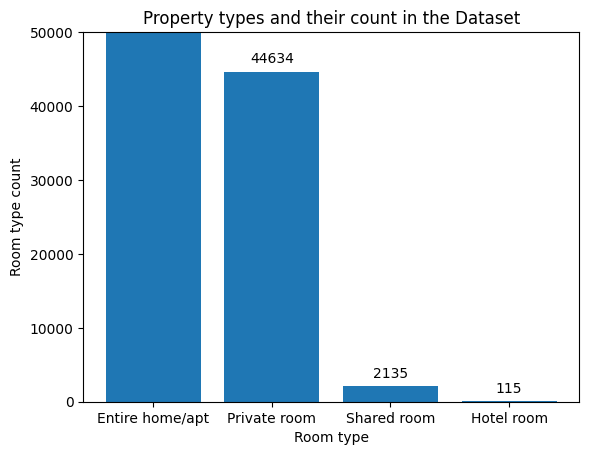

In [12]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room type');
plt.ylabel('Room type count')
plt.title('Property types and their count in the Dataset')

In [13]:
hood_group=df['neighbourhood_group'].value_counts().to_frame()
hood_group

,count
neighbourhood_group,
Manhattan,41726
Brooklyn,40039
Queens,12849
Bronx,2634
Staten Island,925
manhatan,1


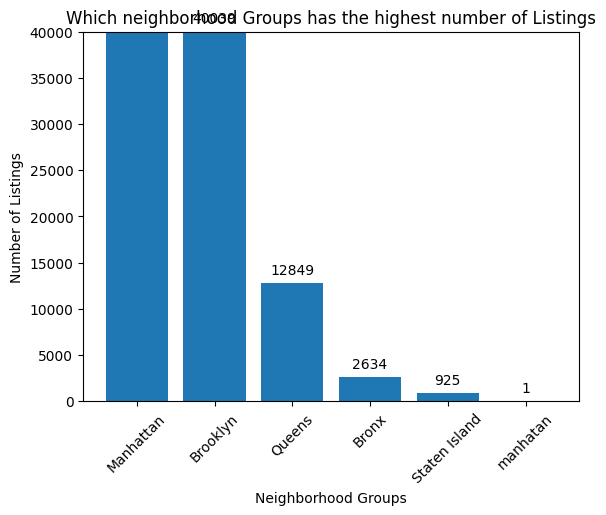

In [14]:
hood_group_bar=plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels= hood_group.loc[:,"count"], padding=4);
plt.ylim([0,40000]); 
plt.xlabel("Neighborhood Groups");
plt.ylabel("Number of Listings");
plt.xticks(rotation=45);
plt.title("Which neighborhood Groups has the highest number of Listings");

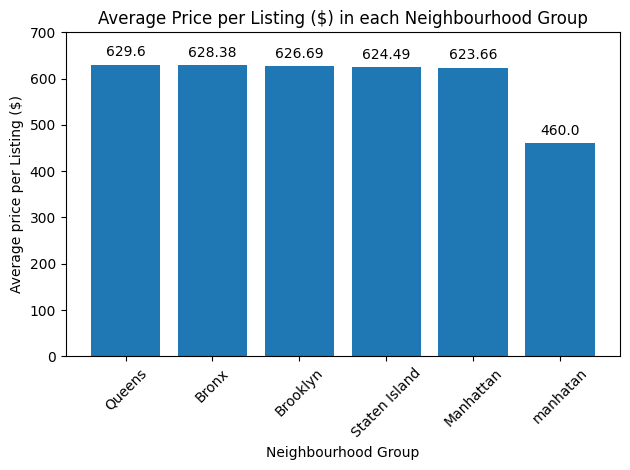

In [15]:
# Group, average, and sort
avg_price = (
    df.groupby('neighbourhood_group', as_index=False)['price_$']
      .mean()
      .sort_values('price_$', ascending=False)
)

# Plot
avg_price_bar = plt.bar(avg_price['neighbourhood_group'], avg_price['price_$'])
plt.bar_label(avg_price_bar, labels=avg_price['price_$'].round(2), label_type='edge', padding=4)

plt.ylim([0, 700])
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average price per Listing ($)")
plt.xticks(rotation=45)
plt.title("Average Price per Listing ($) in each Neighbourhood Group")
plt.tight_layout()

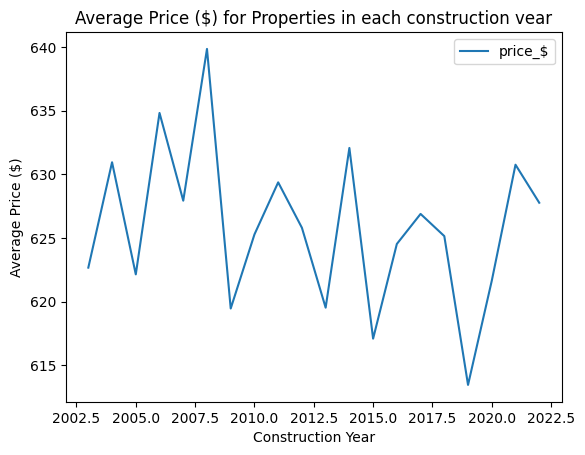

In [17]:
#1s there a relationship between the construction year of property and price?
df.groupby(df["construction_year"])['price_$'].mean().to_frame().plot();
plt.xlabel("Construction Year");
plt.ylabel('Average Price ($)');
plt.title("Average Price ($) for Properties in each construction vear");

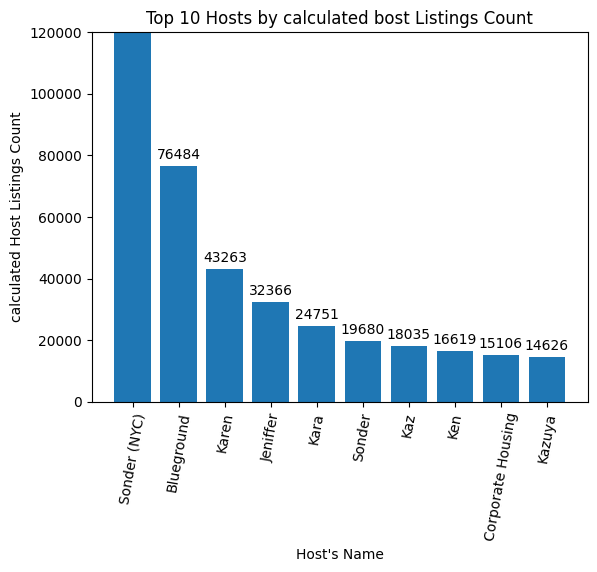

In [20]:
hosts =df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending =False).nlargest(10).to_frame()
hosts_bar= plt.bar(hosts.index,hosts.loc[:, 'calculated_host_listings_count']);
plt.bar_label(hosts_bar, label=hosts.loc[:, 'calculated_host_listings_count'], label_type='edge', padding =3);
plt.xlabel("Host's Name");
plt.ylabel("calculated Host Listings Count");
plt.xticks(rotation=80);
plt.ylim([0, 120000]);
plt.title("Top 10 Hosts by calculated bost Listings Count");

In [21]:
review=df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending=False).to_frame()
review

,review_rate_number
host_identity_verified,
verified,3.291830
unconfirmed,3.281474


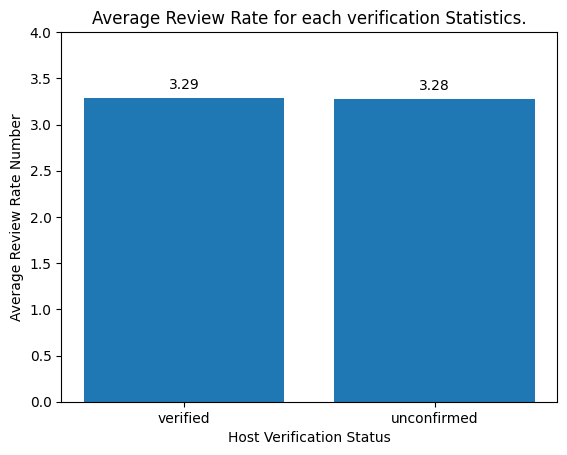

In [22]:
review_bar=plt.bar(review.index, review.loc[:, "review_rate_number"]);
plt.bar_label(review_bar, labels =round(review.loc[:, "review_rate_number"], 2), padding= 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification Statistics.');

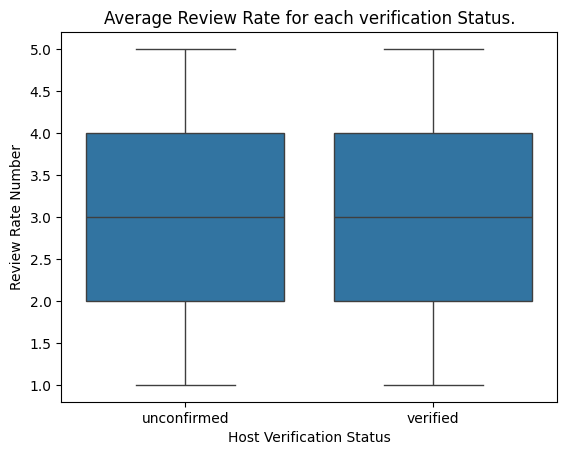

In [23]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review_rate_number",color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each verification Status.');

In [24]:
df['price_$'].corr(df['service_fee_$'])

0.9941423829368048

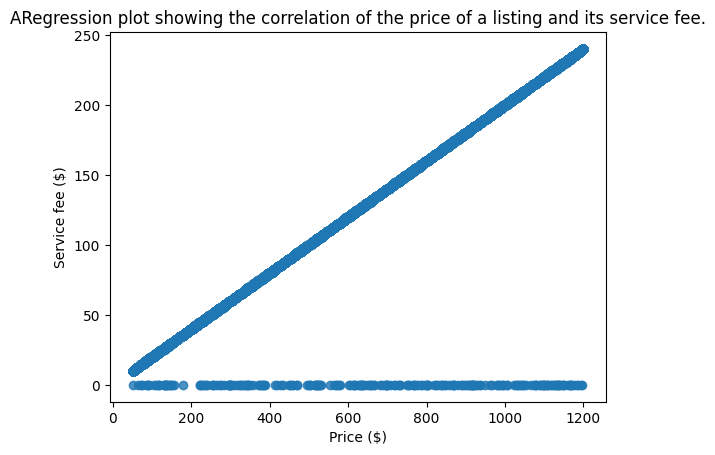

In [25]:
sns.regplot(df,x="price_$",y='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service fee ($)');
plt.title('ARegression plot showing the correlation of the price of a listing and its service fee.');

In [26]:
neigh=df.groupby(['neighbourhood_group','room_type'])['review_rate_number'].mean().to_frame()
neigh

review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            3.342424
                    Private room               3.340819
                    Shared room                3.238938
Brooklyn            Entire home/apt            3.259144
                    Hotel room                 3.857143
                    Private room               3.272420
                    Shared room                3.331665
Manhattan           Entire home/apt            3.283245
                    Hotel room                 3.500000
                    Private room               3.285484
                    Shared room                3.277518
Queens              Entire home/apt            3.354800
                    Hotel room                 3.750000
                    Private room               3.320823
                    Shared room                3.368876
Staten Island       Entire home/apt            3.331887
                    Private room               3.463964
                    Shared room                3.533333
manhatan            Private room               3.000000

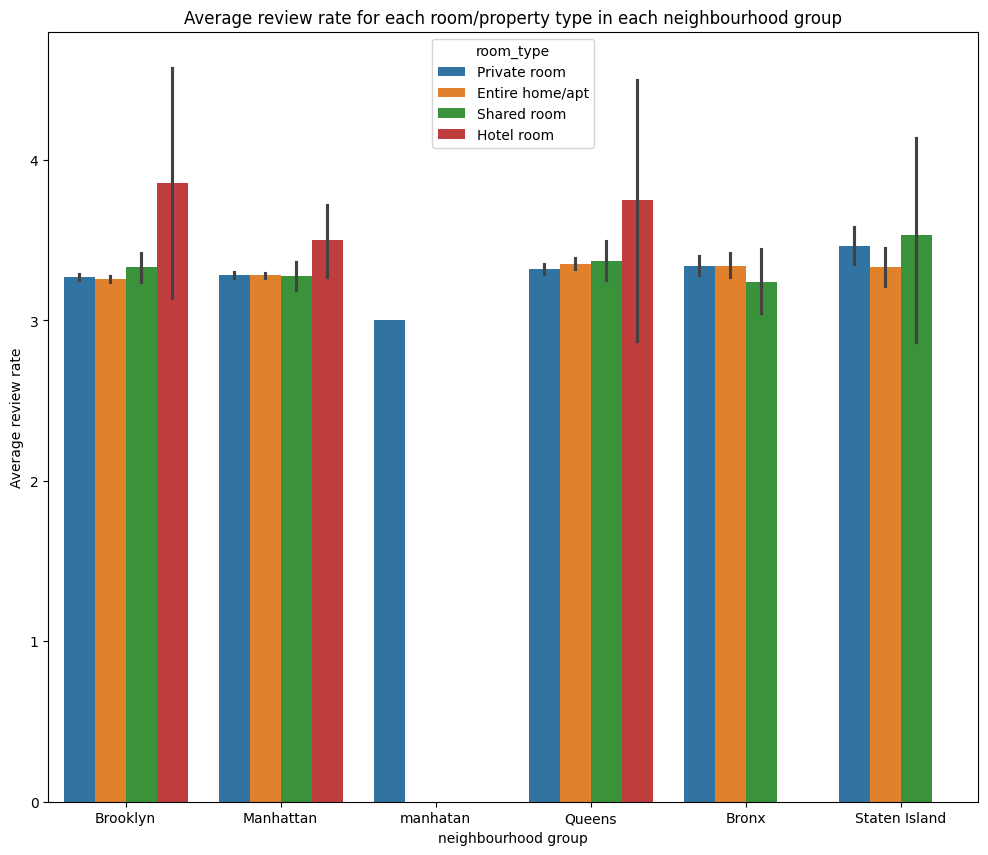

In [30]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood_group',y='review_rate_number',hue='room_type')
plt.xlabel('neighbourhood group')
plt.ylabel('Average review rate');
plt.title("Average review rate for each room/property type in each neighbourhood group");

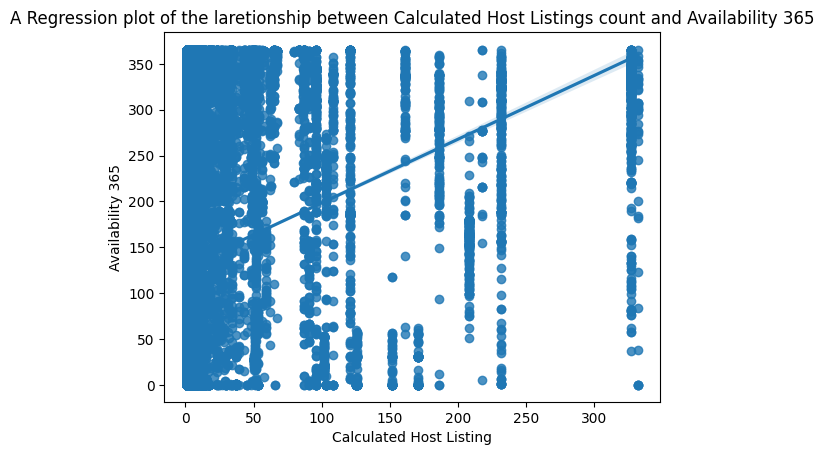

In [28]:
sns.regplot(df, x="calculated_host_listings_count",y="availability_365");
plt.xlabel('Calculated Host Listing')
plt.ylabel('Availability 365');
plt.title("A Regression plot of the laretionship between Calculated Host Listings count and Availability 365");

In [29]:
df['calculated_host_listings_count'].corr(df['availability_365'])

0.17490516697757622